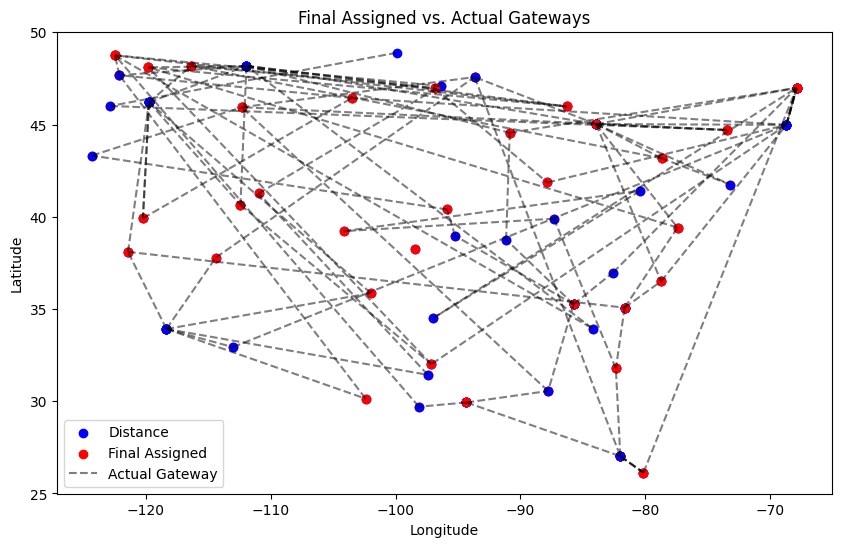

Plot generated and distances saved to 'gateway_summary_with_distances.csv'.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Load the data
gateway_summary = pd.read_csv(r"C:\Users\aruna\Desktop\MS Thesis\Real Data\NN_model_2_stage\results\gateway_summary_16_03_40.csv")
df_gw = pd.read_csv(r"C:\Users\aruna\Desktop\MS Thesis\Real Data\df_gw.csv")

# Create a dictionary to map gw_id to coordinates
gw_coords = df_gw.set_index('gw_id')[['latitude', 'longitude']].to_dict(orient='index')

# Function to calculate distance
def calculate_distance(gw1, gw2):
    if gw1 in gw_coords and gw2 in gw_coords:
        return geodesic((gw_coords[gw1]['latitude'], gw_coords[gw1]['longitude']),
                        (gw_coords[gw2]['latitude'], gw_coords[gw2]['longitude'])).km
    return None

# Calculate distances
gateway_summary['Distance (km)'] = gateway_summary.apply(
    lambda row: calculate_distance(row['Final Gateway Assigned'], row['Actual Gateway']), axis=1)

# Plot the results
plt.figure(figsize=(10, 6))

for _, row in gateway_summary.iterrows():
    if row['Final Gateway Assigned'] in gw_coords and row['Actual Gateway'] in gw_coords:
        final_pos = gw_coords[row['Final Gateway Assigned']]
        actual_pos = gw_coords[row['Actual Gateway']]

        plt.scatter(final_pos['longitude'], final_pos['latitude'], color='blue', label='Final Assigned Gateway')
        plt.scatter(actual_pos['longitude'], actual_pos['latitude'], color='red', label='Actual Gateway')
        plt.plot([final_pos['longitude'], actual_pos['longitude']], 
                 [final_pos['latitude'], actual_pos['latitude']], 'k--', alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Final Assigned vs. Actual Gateways")
plt.legend(["Distance", "Final Assigned", "Actual Gateway"])
plt.show()

# Save the updated dataframe with distances
gateway_summary.to_csv(r"C:\Users\aruna\Desktop\MS Thesis\Real Data\NN_model_2_stage\results\gateway_summary_with_distances.csv", index=False)

print("Plot generated and distances saved to 'gateway_summary_with_distances.csv'.")


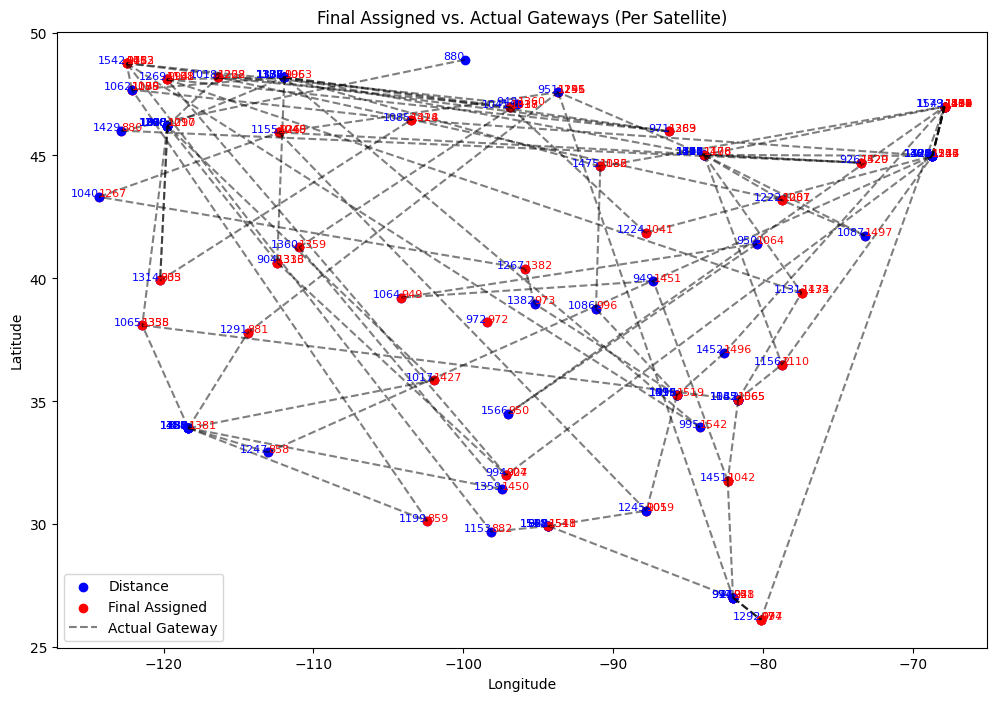

Plot generated and distances saved to 'gateway_summary_with_distances.csv'.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Load the data
gateway_summary = pd.read_csv(r"C:\Users\aruna\Desktop\MS Thesis\Real Data\NN_model_2_stage\results\gateway_summary_16_03_40.csv")
df_gw = pd.read_csv(r"C:\Users\aruna\Desktop\MS Thesis\Real Data\df_gw.csv")

# Create a dictionary to map gw_id to coordinates
gw_coords = df_gw.set_index('gw_id')[['latitude', 'longitude']].to_dict(orient='index')

# Function to calculate distance
def calculate_distance(gw1, gw2):
    if gw1 in gw_coords and gw2 in gw_coords:
        return geodesic((gw_coords[gw1]['latitude'], gw_coords[gw1]['longitude']),
                        (gw_coords[gw2]['latitude'], gw_coords[gw2]['longitude'])).km
    return None

# Calculate distances
gateway_summary['Distance (km)'] = gateway_summary.apply(
    lambda row: calculate_distance(row['Final Gateway Assigned'], row['Actual Gateway']), axis=1)

# Plot the results
plt.figure(figsize=(12, 8))

for _, row in gateway_summary.iterrows():
    satellite = row['Satellite']
    final_gw = row['Final Gateway Assigned']
    actual_gw = row['Actual Gateway']

    if final_gw in gw_coords and actual_gw in gw_coords:
        final_pos = gw_coords[final_gw]
        actual_pos = gw_coords[actual_gw]

        # Plot final assigned gateway
        plt.scatter(final_pos['longitude'], final_pos['latitude'], color='blue', label='Final Assigned Gateway' if _ == 0 else "")
        plt.text(final_pos['longitude'], final_pos['latitude'], str(satellite), fontsize=8, color='blue', ha='right')

        # Plot actual gateway
        plt.scatter(actual_pos['longitude'], actual_pos['latitude'], color='red', label='Actual Gateway' if _ == 0 else "")
        plt.text(actual_pos['longitude'], actual_pos['latitude'], str(satellite), fontsize=8, color='red', ha='left')

        # Draw line connecting them
        plt.plot([final_pos['longitude'], actual_pos['longitude']], 
                 [final_pos['latitude'], actual_pos['latitude']], 'k--', alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Final Assigned vs. Actual Gateways (Per Satellite)")
plt.legend(["Distance", "Final Assigned", "Actual Gateway"])
plt.show()

# Save the updated dataframe with distances
gateway_summary.to_csv(r"C:\Users\aruna\Desktop\MS Thesis\Real Data\NN_model_2_stage\results\gateway_summary_with_distances.csv", index=False)

print("Plot generated and distances saved to 'gateway_summary_with_distances.csv'.")


C:\Users\aruna\AppData\Local\Temp\ipykernel_17488\3562231448.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(satellites))  # Use a colormap for distinct colors


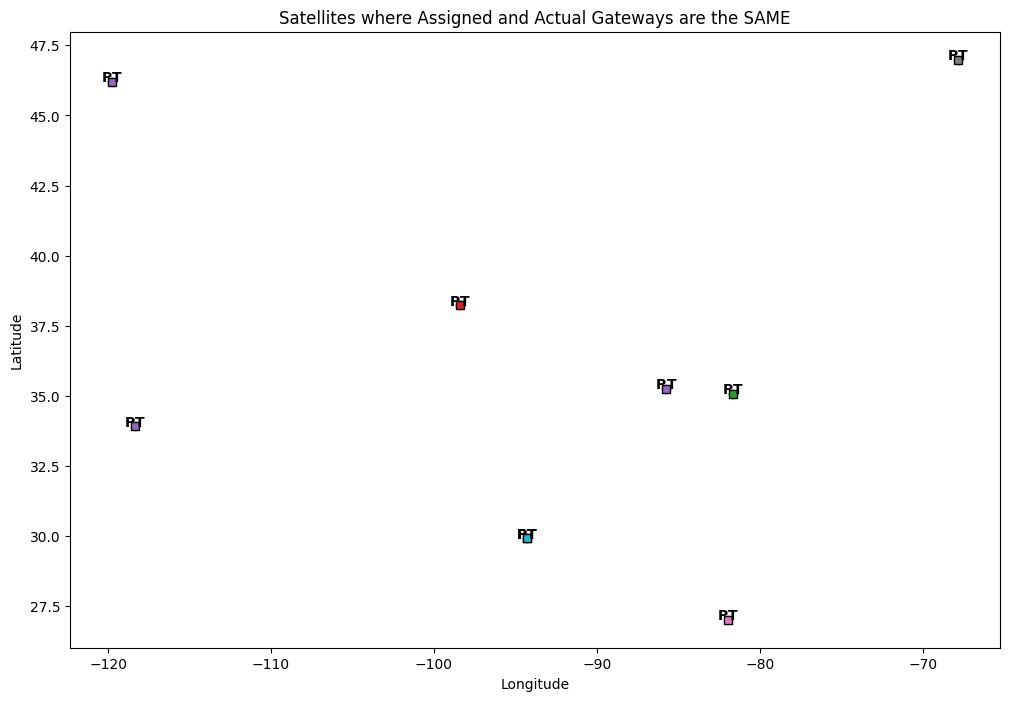

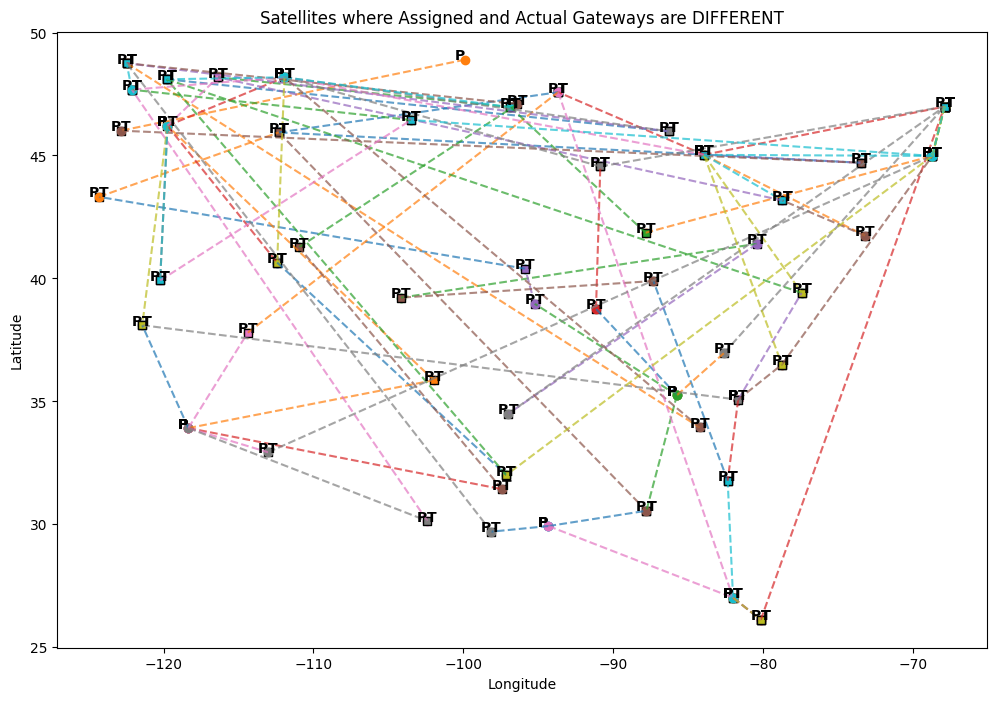

Plots generated and distances saved to 'gateway_summary_with_distances.csv'.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic

# Load the data
gateway_summary = pd.read_csv(r"C:\Users\aruna\Desktop\MS Thesis\Real Data\NN_model_2_stage\results\gateway_summary_16_03_40.csv")
df_gw = pd.read_csv(r"C:\Users\aruna\Desktop\MS Thesis\Real Data\df_gw.csv")

# Create a dictionary to map gw_id to coordinates
gw_coords = df_gw.set_index('gw_id')[['latitude', 'longitude']].to_dict(orient='index')

# Function to calculate distance
def calculate_distance(gw1, gw2):
    if gw1 in gw_coords and gw2 in gw_coords:
        return geodesic((gw_coords[gw1]['latitude'], gw_coords[gw1]['longitude']),
                        (gw_coords[gw2]['latitude'], gw_coords[gw2]['longitude'])).km
    return None

# Calculate distances
gateway_summary['Distance (km)'] = gateway_summary.apply(
    lambda row: calculate_distance(row['Final Gateway Assigned'], row['Actual Gateway']), axis=1)

# Separate data where assigned == actual and assigned != actual
same_gateways = gateway_summary[gateway_summary['Final Gateway Assigned'] == gateway_summary['Actual Gateway']]
diff_gateways = gateway_summary[gateway_summary['Final Gateway Assigned'] != gateway_summary['Actual Gateway']]

# Generate a unique color for each satellite
satellites = gateway_summary['Satellite'].unique()
colors = plt.cm.get_cmap("tab10", len(satellites))  # Use a colormap for distinct colors
sat_color_map = {satellite: colors(i) for i, satellite in enumerate(satellites)}

def plot_gateways(data, title):
    plt.figure(figsize=(12, 8))
    
    for _, row in data.iterrows():
        satellite = row['Satellite']
        final_gw = row['Final Gateway Assigned']
        actual_gw = row['Actual Gateway']

        if final_gw in gw_coords and actual_gw in gw_coords:
            final_pos = gw_coords[final_gw]
            actual_pos = gw_coords[actual_gw]

            color = sat_color_map[satellite]

            # Plot assigned gateway (Predicted)
            plt.scatter(final_pos['longitude'], final_pos['latitude'], color=color, label=f'Sat {satellite}' if _ == 0 else "")
            plt.text(final_pos['longitude'], final_pos['latitude'], 'P', fontsize=10, color='black', ha='right', fontweight='bold')

            # Plot actual gateway (True)
            plt.scatter(actual_pos['longitude'], actual_pos['latitude'], color=color, edgecolor='black', marker='s')
            plt.text(actual_pos['longitude'], actual_pos['latitude'], 'T', fontsize=10, color='black', ha='left', fontweight='bold')

            # Draw line connecting them if they are different
            if final_gw != actual_gw:
                plt.plot([final_pos['longitude'], actual_pos['longitude']], 
                         [final_pos['latitude'], actual_pos['latitude']], '--', color=color, alpha=0.7)

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(title)
    plt.show()

# Plot the two cases
plot_gateways(same_gateways, "Satellites where Assigned and Actual Gateways are the SAME")
plot_gateways(diff_gateways, "Satellites where Assigned and Actual Gateways are DIFFERENT")

# Save the updated dataframe with distances
gateway_summary.to_csv(r"C:\Users\aruna\Desktop\MS Thesis\Real Data\NN_model_2_stage\results\gateway_summary_with_distances.csv", index=False)

print("Plots generated and distances saved to 'gateway_summary_with_distances.csv'.")


another set

C:\Users\aruna\AppData\Local\Temp\ipykernel_17488\3562231448.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(satellites))  # Use a colormap for distinct colors


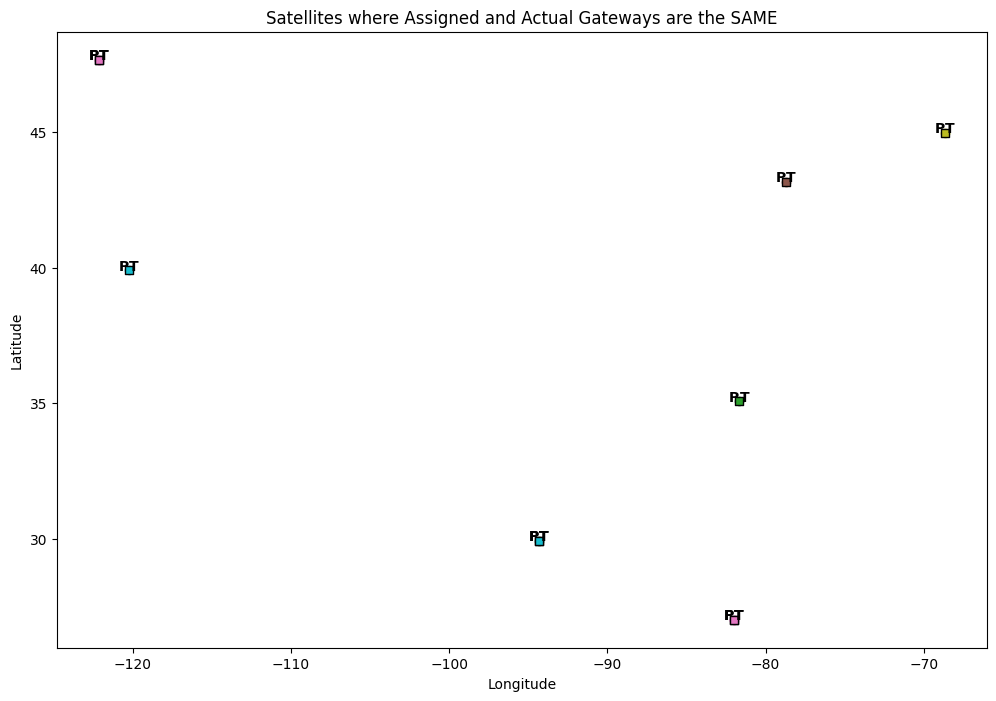

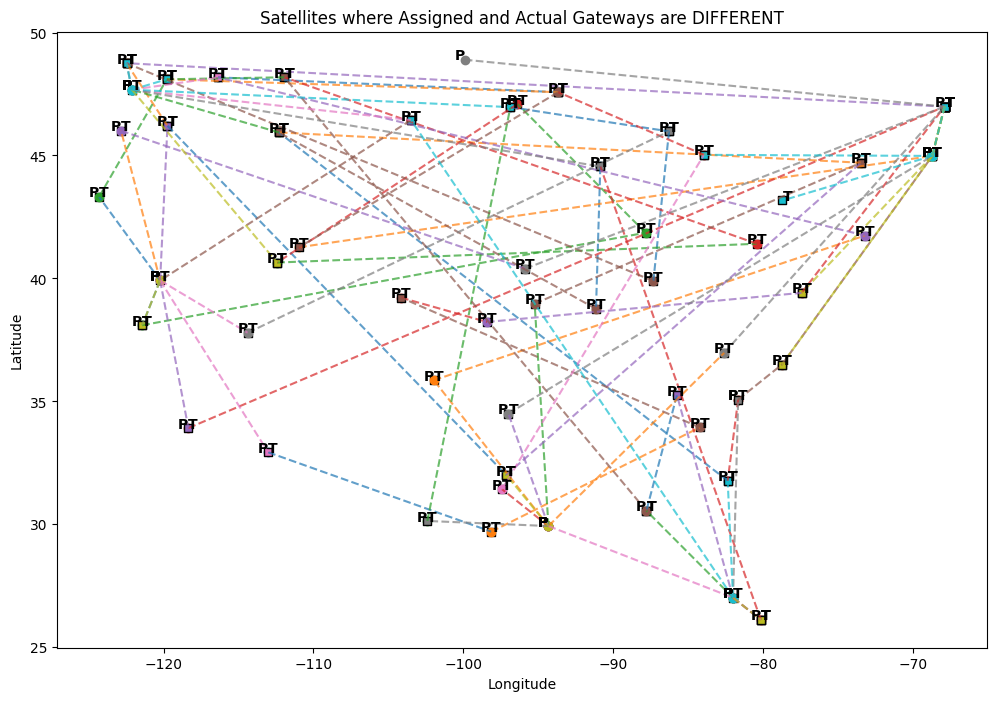

Plots generated and distances saved to 'gateway_summary_with_distances.csv'.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic

# Load the data
gateway_summary = pd.read_csv(r"C:\Users\aruna\Desktop\MS Thesis\Real Data\NN_model_2_stage\results\gateway_summary_16_03_40.csv")
df_gw = pd.read_csv(r"C:\Users\aruna\Desktop\MS Thesis\Real Data\df_gw.csv")

# Create a dictionary to map gw_id to coordinates
gw_coords = df_gw.set_index('gw_id')[['latitude', 'longitude']].to_dict(orient='index')

# Function to calculate distance
def calculate_distance(gw1, gw2):
    if gw1 in gw_coords and gw2 in gw_coords:
        return geodesic((gw_coords[gw1]['latitude'], gw_coords[gw1]['longitude']),
                        (gw_coords[gw2]['latitude'], gw_coords[gw2]['longitude'])).km
    return None

# Calculate distances
gateway_summary['Distance (km)'] = gateway_summary.apply(
    lambda row: calculate_distance(row['Final Gateway Assigned'], row['Actual Gateway']), axis=1)

# Separate data where assigned == actual and assigned != actual
same_gateways = gateway_summary[gateway_summary['Final Gateway Assigned'] == gateway_summary['Actual Gateway']]
diff_gateways = gateway_summary[gateway_summary['Final Gateway Assigned'] != gateway_summary['Actual Gateway']]

# Generate a unique color for each satellite
satellites = gateway_summary['Satellite'].unique()
colors = plt.cm.get_cmap("tab10", len(satellites))  # Use a colormap for distinct colors
sat_color_map = {satellite: colors(i) for i, satellite in enumerate(satellites)}

def plot_gateways(data, title):
    plt.figure(figsize=(12, 8))
    
    for _, row in data.iterrows():
        satellite = row['Satellite']
        final_gw = row['Final Gateway Assigned']
        actual_gw = row['Actual Gateway']

        if final_gw in gw_coords and actual_gw in gw_coords:
            final_pos = gw_coords[final_gw]
            actual_pos = gw_coords[actual_gw]

            color = sat_color_map[satellite]

            # Plot assigned gateway (Predicted)
            plt.scatter(final_pos['longitude'], final_pos['latitude'], color=color, label=f'Sat {satellite}' if _ == 0 else "")
            plt.text(final_pos['longitude'], final_pos['latitude'], 'P', fontsize=10, color='black', ha='right', fontweight='bold')

            # Plot actual gateway (True)
            plt.scatter(actual_pos['longitude'], actual_pos['latitude'], color=color, edgecolor='black', marker='s')
            plt.text(actual_pos['longitude'], actual_pos['latitude'], 'T', fontsize=10, color='black', ha='left', fontweight='bold')

            # Draw line connecting them if they are different
            if final_gw != actual_gw:
                plt.plot([final_pos['longitude'], actual_pos['longitude']], 
                         [final_pos['latitude'], actual_pos['latitude']], '--', color=color, alpha=0.7)

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(title)
    plt.show()

# Plot the two cases
plot_gateways(same_gateways, "Satellites where Assigned and Actual Gateways are the SAME")
plot_gateways(diff_gateways, "Satellites where Assigned and Actual Gateways are DIFFERENT")

# Save the updated dataframe with distances
gateway_summary.to_csv(r"C:\Users\aruna\Desktop\MS Thesis\Real Data\NN_model_2_stage\results\gateway_summary_with_distances.csv", index=False)

print("Plots generated and distances saved to 'gateway_summary_with_distances.csv'.")


3rd set

C:\Users\aruna\AppData\Local\Temp\ipykernel_17488\585465426.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(satellites))  # Use a colormap for distinct colors


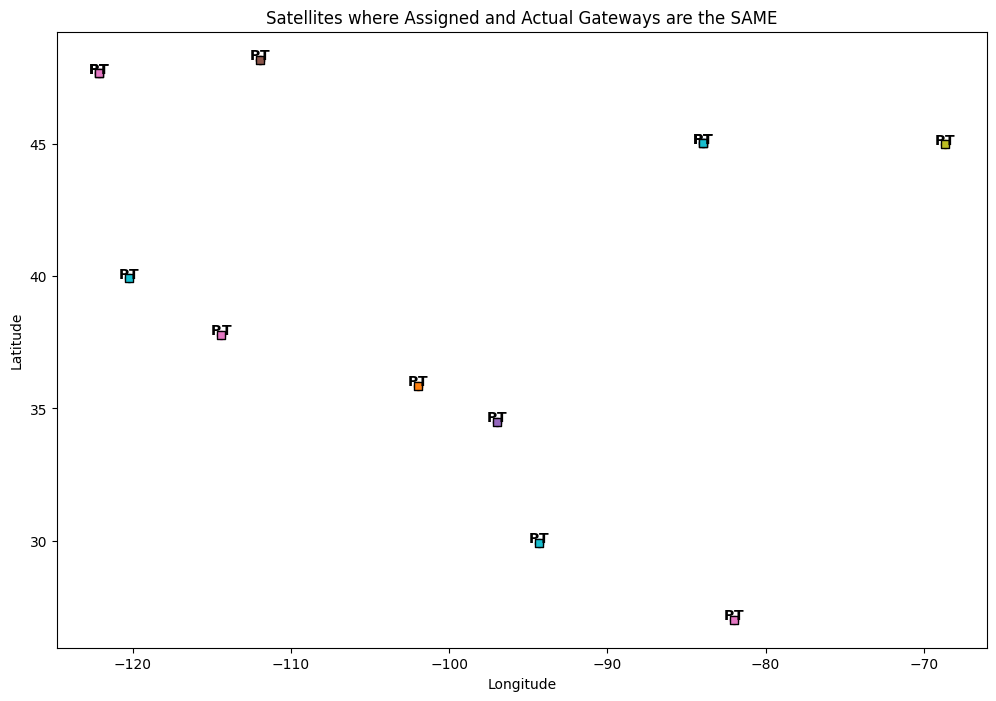

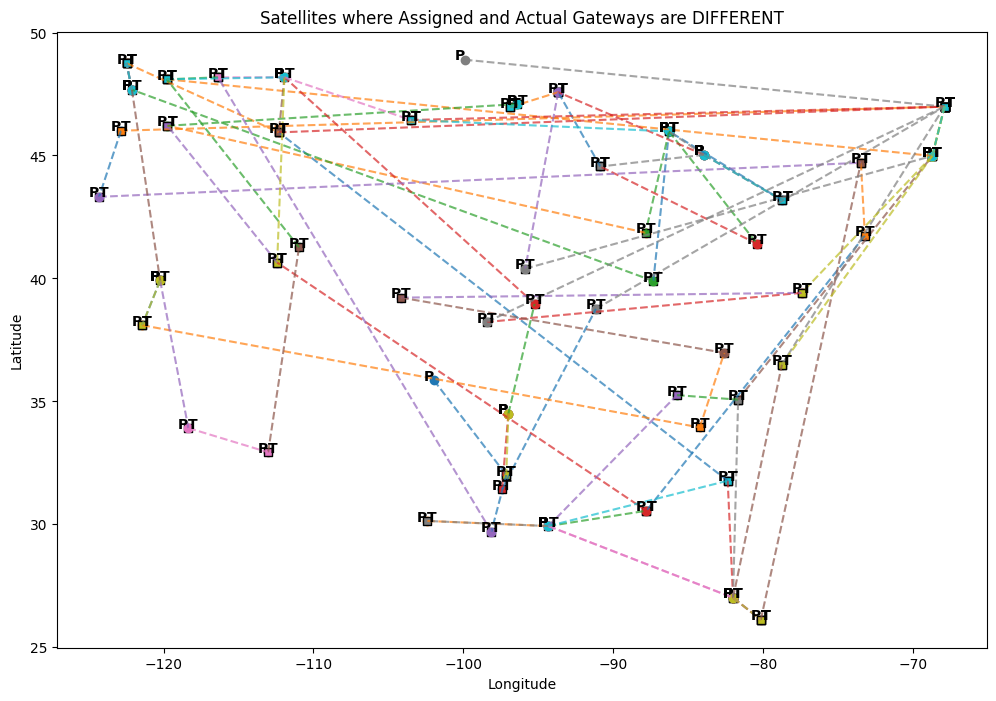

Plots generated and distances saved to 'gateway_summary_with_distances.csv'.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic

# Load the data
gateway_summary = pd.read_csv(r"C:\Users\aruna\Desktop\MS Thesis\Real Data\NN_model_2_stage\results\gateway_summary_16_03_40.csv")
df_gw = pd.read_csv(r"C:\Users\aruna\Desktop\MS Thesis\Real Data\df_gw.csv")

# Create a dictionary to map gw_id to coordinates
gw_coords = df_gw.set_index('gw_id')[['latitude', 'longitude']].to_dict(orient='index')

# Function to calculate distance
def calculate_distance(gw1, gw2):
    if gw1 in gw_coords and gw2 in gw_coords:
        return geodesic((gw_coords[gw1]['latitude'], gw_coords[gw1]['longitude']),
                        (gw_coords[gw2]['latitude'], gw_coords[gw2]['longitude'])).km
    return None

# Calculate distances
gateway_summary['Distance (km)'] = gateway_summary.apply(
    lambda row: calculate_distance(row['Final Gateway Assigned'], row['Actual Gateway']), axis=1)

# Separate data where assigned == actual and assigned != actual
same_gateways = gateway_summary[gateway_summary['Final Gateway Assigned'] == gateway_summary['Actual Gateway']]
diff_gateways = gateway_summary[gateway_summary['Final Gateway Assigned'] != gateway_summary['Actual Gateway']]

# Generate a unique color for each satellite
satellites = gateway_summary['Satellite'].unique()
colors = plt.cm.get_cmap("tab10", len(satellites))  # Use a colormap for distinct colors
sat_color_map = {satellite: colors(i) for i, satellite in enumerate(satellites)}

def plot_gateways(data, title):
    plt.figure(figsize=(12, 8))
    
    for _, row in data.iterrows():
        satellite = row['Satellite']
        final_gw = row['Final Gateway Assigned']
        actual_gw = row['Actual Gateway']

        if final_gw in gw_coords and actual_gw in gw_coords:
            final_pos = gw_coords[final_gw]
            actual_pos = gw_coords[actual_gw]

            color = sat_color_map[satellite]

            # Plot assigned gateway (Predicted)
            plt.scatter(final_pos['longitude'], final_pos['latitude'], color=color, label=f'Sat {satellite}' if _ == 0 else "")
            plt.text(final_pos['longitude'], final_pos['latitude'], 'P', fontsize=10, color='black', ha='right', fontweight='bold')

            # Plot actual gateway (True)
            plt.scatter(actual_pos['longitude'], actual_pos['latitude'], color=color, edgecolor='black', marker='s')
            plt.text(actual_pos['longitude'], actual_pos['latitude'], 'T', fontsize=10, color='black', ha='left', fontweight='bold')

            # Draw line connecting them if they are different
            if final_gw != actual_gw:
                plt.plot([final_pos['longitude'], actual_pos['longitude']], 
                         [final_pos['latitude'], actual_pos['latitude']], '--', color=color, alpha=0.7)

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(title)
    plt.show()

# Plot the two cases
plot_gateways(same_gateways, "Satellites where Assigned and Actual Gateways are the SAME")
plot_gateways(diff_gateways, "Satellites where Assigned and Actual Gateways are DIFFERENT")

# Save the updated dataframe with distances
gateway_summary.to_csv(r"C:\Users\aruna\Desktop\MS Thesis\Real Data\NN_model_2_stage\results\gateway_summary_with_distances.csv", index=False)

print("Plots generated and distances saved to 'gateway_summary_with_distances.csv'.")

C:\Users\aruna\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


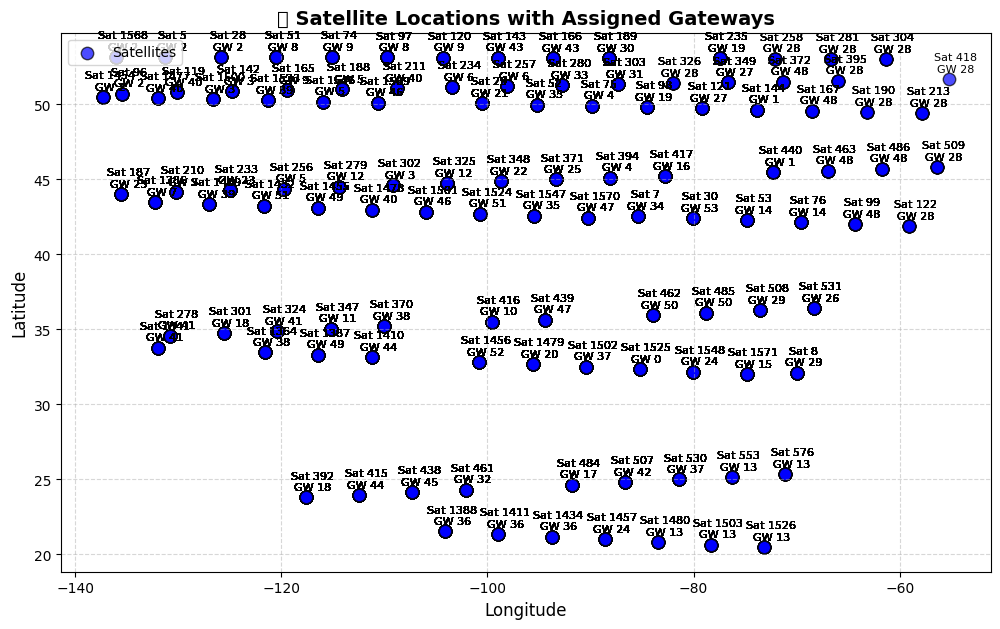

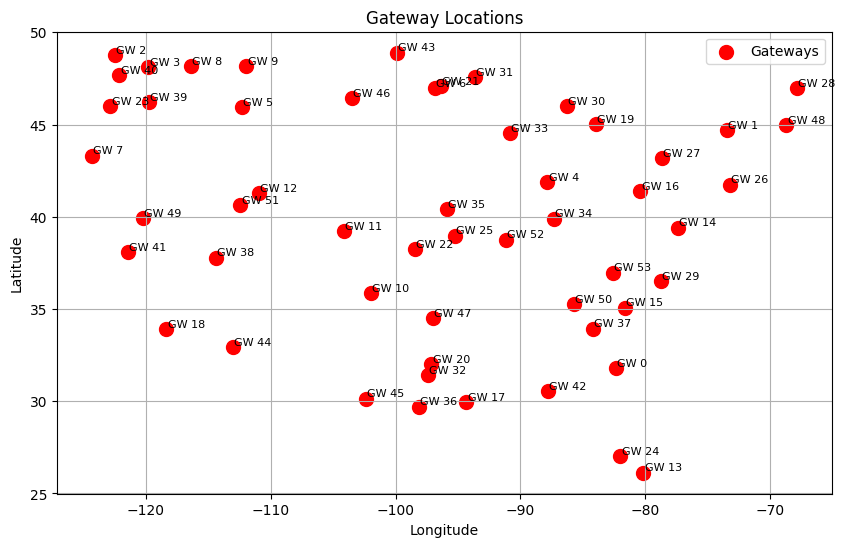

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
satellite_file_path = "C:\\Users\\aruna\\Desktop\\MS Thesis\\Real Data\\Files with position\\optimal_file_data_00_00_00.csv"
gateway_file_path = "C:\\Users\\aruna\\Desktop\\MS Thesis\\Real Data\\df_gw.csv"

# Load Satellite Data
df_satellites = pd.read_csv(satellite_file_path)

# Ensure only valid positions are used
df_satellites = df_satellites[["feed_sat", "Latitude", "Longitude", "gw"]]  # Keep relevant columns
df_satellites = df_satellites.dropna()  # Remove any NaN values

# Load Gateway Data
df_gateways = pd.read_csv(gateway_file_path)

# Improved Plot 1: Satellites with Assigned Gateways
plt.figure(figsize=(12, 7))
plt.scatter(df_satellites["Longitude"], df_satellites["Latitude"], color="blue", edgecolors="black", alpha=0.7, s=80, label="Satellites")

# Add text labels with better positioning
for _, row in df_satellites.iterrows():
    plt.annotate(f"Sat {int(row['feed_sat'])}\nGW {int(row['gw'])}", 
                 (row["Longitude"], row["Latitude"]), 
                 textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8, color="black")

# Improve aesthetics
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.title("🌍 Satellite Locations with Assigned Gateways", fontsize=14, fontweight='bold')
plt.legend(["Satellites"], loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
# 🛰️ **Plot 2: Gateways Only**
plt.figure(figsize=(10, 6))
plt.scatter(df_gateways["longitude"], df_gateways["latitude"], color="red", s=100, label="Gateways")
for _, row in df_gateways.iterrows():
    plt.text(row["longitude"] + 0.1, row["latitude"] + 0.1, f"GW {int(row['gw_id'])}", fontsize=8, color="black")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Gateway Locations")
plt.legend(["Gateways"])
plt.grid(True)
plt.show()
